In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [67]:
img = '/content/6f8aeb4a-565e-4d18-8e9b-0e564ffd6920.jpeg'
img = cv2.imread(img)
img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB )
img = cv2.resize(img, (300,300))

In [68]:
datagen = ImageDataGenerator(
  #  featurewise_center=True,
  #  samplewise_center=False,
  #  featurewise_std_normalization=False,
  #  samplewise_std_normalization=False,
  #  zca_whitening=False,
  #  zca_epsilon=1e-06,
  #  rotation_range=0,
  #  width_shift_range=0.0,
  #  height_shift_range=0.0,
  #  brightness_range=None,
  #  shear_range=0.0,
  #  zoom_range=0.0,
  #  channel_shift_range=0.0,
  #  fill_mode='nearest',
  #  cval=0.0,
  #  horizontal_flip=False,
  #  vertical_flip=False,
  #  rescale=None,
  #  preprocessing_function=None,
  #  data_format=None,
  #  validation_split=0.0,
  #  interpolation_order=1,
  #  dtype=None
  rotation_range=50,         # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,     # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,    # Randomly shift images vertically (fraction of total height)
    shear_range=0.15,          # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.15,           # Randomly zoom inside pictures
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'
)

In [69]:
img_a = np.expand_dims(img , axis=0)

In [70]:
imag_Data_agum = datagen.flow(img_a,batch_size=1 )



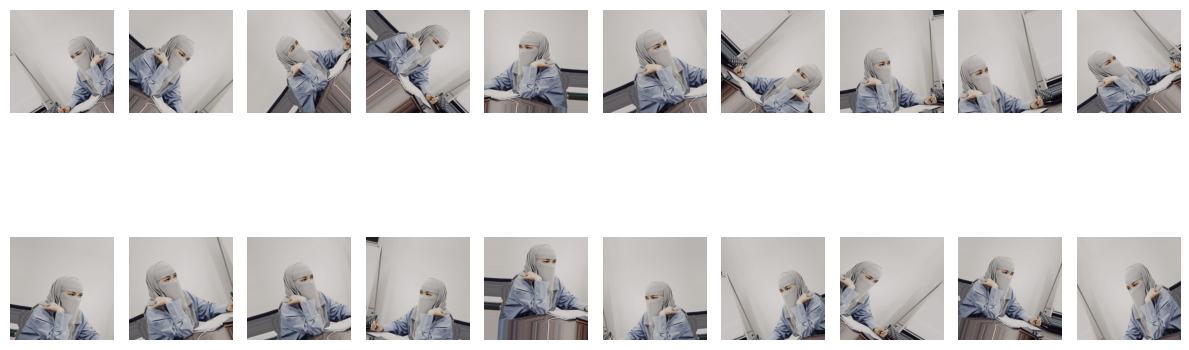

In [77]:
plt.figure(figsize=(12,6))
for i in range(20):
  data_agu = next(imag_Data_agum)[0].astype('uint8')
  plt.subplot(2,10,i+1) # Changed to 2,5 to accommodate 10 images
  plt.imshow(data_agu)
  plt.axis("off")
plt.tight_layout()
plt.show()


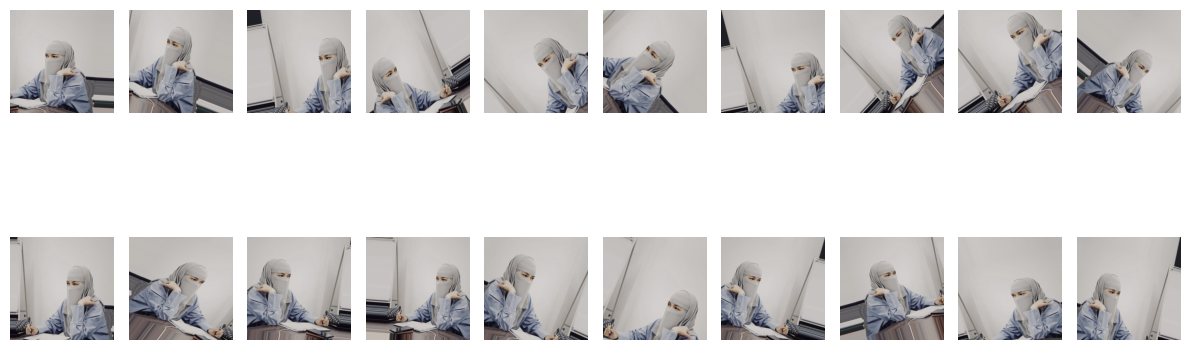

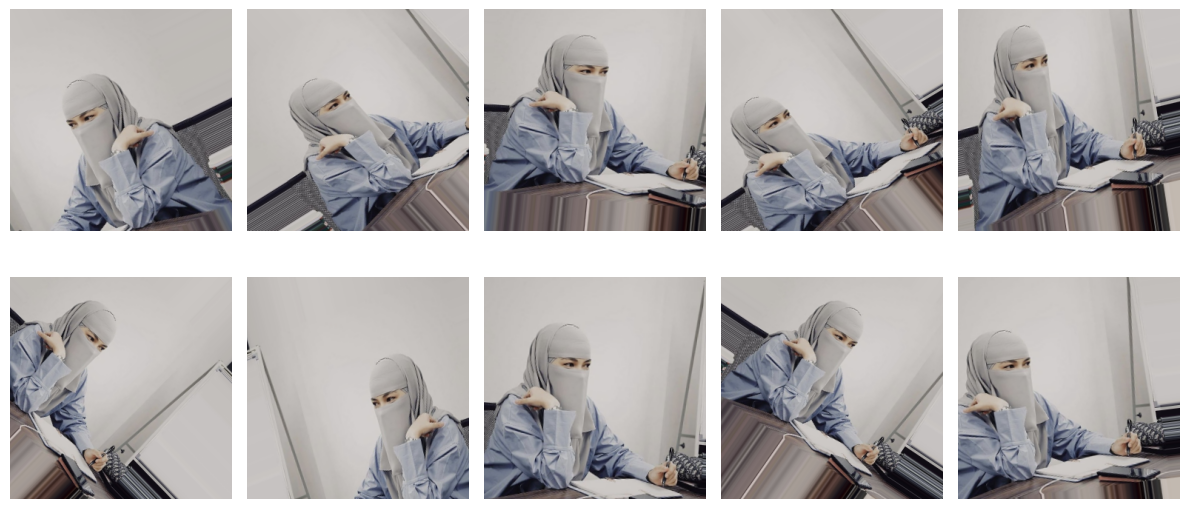

In [76]:
# prompt: ValueError                                Traceback (most recent call last)
# <ipython-input-75-6dbe4388b88c> in <cell line: 0>()
#       4   if i==10:
#       5     data_agu = next(imag_Data_agum)[0].astype('uint8')
# ----> 6   plt.subplot(2,10,i+1) # Changed to 2,5 to accommodate 10 images
#       7   plt.imshow(data_agu)
#       8   plt.axis("off")
# 1 frames
# /usr/local/lib/python3.11/dist-packages/matplotlib/gridspec.py in _from_subplot_args(figure, args)
#     587         else:
#     588             if not isinstance(num, Integral) or num < 1 or num > rows*cols:
# --> 589                 raise ValueError(
#     590                     f"num must be an integer with 1 <= num <= {rows*cols}, "
#     591                     f"not {num!r}"
# ValueError: num must be an integer with 1 <= num <= 20, not 21
# <Figure size 640x480 with 0 Axes>

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = '/content/6f8aeb4a-565e-4d18-8e9b-0e564ffd6920.jpeg'
img = cv2.imread(img)
img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB )
img = cv2.resize(img, (300,300))

datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

img_a = np.expand_dims(img , axis=0)
imag_Data_agum = datagen.flow(img_a,batch_size=1 )

plt.figure(figsize=(12,6))
for i in range(20):
  data_agu = next(imag_Data_agum)[0].astype('uint8')
  plt.subplot(2,10,i+1)
  plt.imshow(data_agu)
  plt.axis("off")
plt.tight_layout()
plt.show()

# The error was in the second loop, trying to plot on a subplot that was out of range
# Also, the datagen.flow was used without being reset between calls
# The next(imag_Data_agum) in the loop was generating more images beyond what was needed

plt.figure(figsize=(12,6))
i = 0
imag_Data_agum = datagen.flow(img_a, batch_size=1)  # Reset the generator
for output in imag_Data_agum: # Use the imag_Data_agum directly
    i += 1
    if i > 10:
      break
    data_agu = output[0].astype('uint8')
    plt.subplot(2,5,i) # Corrected subplot call for 10 images in 2 rows
    plt.imshow(data_agu)
    plt.axis("off")
plt.tight_layout()
plt.show()
